## Dataset Creation

In [21]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial

%matplotlib inline
# matplotlib.style.use('ggplot')

In [22]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)
    df.columns = df.iloc[0]
    df = df[1:]
    df['RTT'] = pd.to_numeric(df['RTT'], downcast="float")
    df['MessageSize'] = pd.to_numeric(df['MessageSize'], downcast="integer")
    df['NumberOfMessages'] = pd.to_numeric(df['NumberOfMessages'], downcast="integer")
    df[df.columns[4]] = pd.to_numeric(df[df.columns[4]], downcast="integer")
    
    return df

In [23]:
def getBenchmark(benchmark):
    resultsFolder = "../credentials/results/Benchmark"+str(benchmark)+"/"
    resultsFiles = os.listdir(resultsFolder)

    df = getDataframe(resultsFolder+resultsFiles[0])
    for i in range(len(resultsFiles)-1):
        df = pd.concat([df, getDataframe(resultsFolder+resultsFiles[i+1])])
    return df
    

In [24]:
def plot_results(df, messagesComb, yerror, legentOut, title, x_label, x_column):
    fig, ax = plt.subplots(figsize=(10, 6))

#     ax.set_title(title +'\n', fontsize=20)
    ax.set_ylabel('Média de RTT (ms)\n', fontsize=16)
    ax.set_xlabel('\n'+x_label, fontsize=16)
    legend = []
    
    for comb in messagesComb:
        legend.append("\nNº Mensagens: " + str(comb[1]) + "\nTamanho Mensagem: " + str(comb[0])+ '\n')
        exp = df[df.MessageSize == comb[0]]
        exp = exp[exp.NumberOfMessages == comb[1]]
        if yerror:
            plt.errorbar(exp[x_column], exp['RTT_mean'], yerr=exp['RTT_std'], fmt='--s')
        else:
             plt.errorbar(exp[x_column], exp['RTT_mean'], fmt='--s')
    if legentOut:
        ax.legend(legend, loc='upper right', bbox_to_anchor=(1.36 , 1.015), fontsize=12)
    else:
        ax.legend(legend, fontsize=12)
    fig.tight_layout()

As funções abaixo servem para fazer uma aprocimação otimizadas dos gráficos gerados.

A função **funcE** aproxima a curva para uma exponencial, e **funcL** aproxima para uma reta.

In [25]:
def funcPoisson(k, lamb):
    return np.exp(-lamb)*np.power(lamb, k)/factorial(k)

def funcLog(x, a, b, c):
    return b*np.log(a*x) + c


def funcExp(x, a, b, c):
    return b*np.exp(a*x) + c

def funcLin(x, a, b):
    return a*x + b

## Dataset Statistics

In [46]:
df = getBenchmark(1)

In [47]:
print("Valores Máximos:",df.max()["RTT"])
print("Valores Mínimos:", df.min()["RTT"])
print("Valores Médios:", df.mean()["RTT"])
print("Valores Desvio:", df.std()["RTT"])

Valores Máximos: 238.0
Valores Mínimos: 0.0
Valores Médios: 2.63252
Valores Desvio: 4.63922


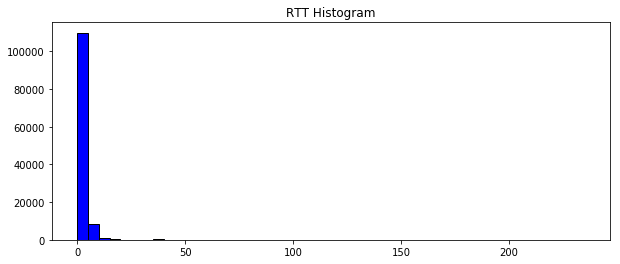

In [51]:
plt.figure(figsize=(10,4))
plt.hist(df['RTT'], bins=range(int(df.min()["RTT"]),int(df.max()["RTT"]),5), 
         histtype='bar', ec='black', color='blue')
plt.title("RTT Histogram")
plt.show()

## Benchmark 1

In [29]:
df = getBenchmark(1)
df = df.groupby(['NumberOfHosts', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfHosts,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,4,1,1000,2.337000,1.0,23.0,1.724651
1,4,1000,1000,2.916000,1.0,51.0,2.282984
2,4,1000,2000,8.658167,1.0,238.0,17.708366
3,6,1,1000,2.194200,1.0,33.0,1.756674
4,6,1,2000,2.018800,0.0,207.0,2.583392
5,6,1000,1000,2.853200,1.0,28.0,2.098602
6,6,1000,2000,2.462100,1.0,62.0,1.770897
7,8,1,1000,2.250286,0.0,194.0,2.943957
8,8,1,2000,1.889143,0.0,49.0,1.569359
9,8,1000,1000,2.556857,1.0,49.0,1.889177


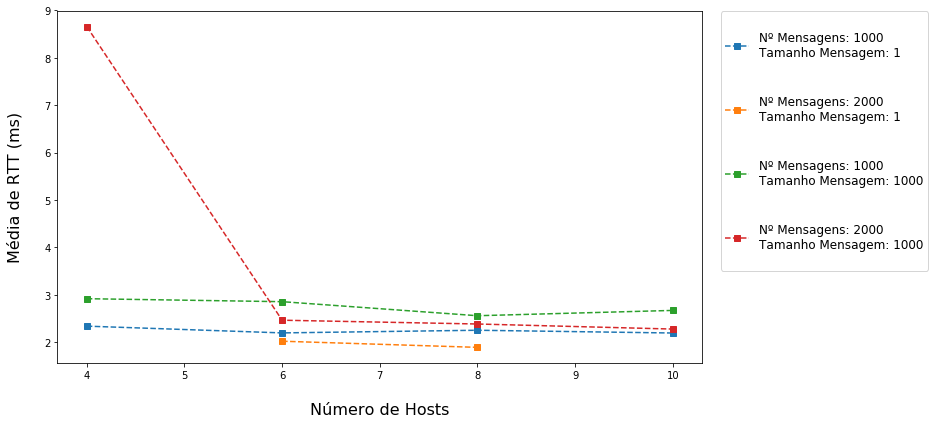

In [30]:
messagesComb = [(1,1000),(1,2000), (1000,1000),(1000,2000)]
plot_results(df, messagesComb, False, True,
             'Benchmark 1 - Número de Hosts', 
             'Número de Hosts', 
             'NumberOfHosts')

## Benchmark 2

In [31]:
df = getBenchmark(2)
df = df.groupby(['NumberOfSender', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfSender,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,4,1,1000,2.9900,1.0,80.0,3.194386
1,4,1,2000,2.6590,1.0,87.0,3.896063
2,4,1000,1000,3.4390,1.0,91.0,3.431626
3,4,1000,2000,2.9925,1.0,101.0,3.146966
4,6,1,1000,2.9750,1.0,92.0,3.440670
5,6,1,2000,2.7575,1.0,84.0,2.485313
6,6,1000,1000,3.8170,1.0,102.0,4.095887
7,6,1000,2000,3.5185,1.0,92.0,2.927959
8,8,1,1000,2.9940,1.0,87.0,3.488572
9,8,1,2000,3.4425,1.0,92.0,2.775346


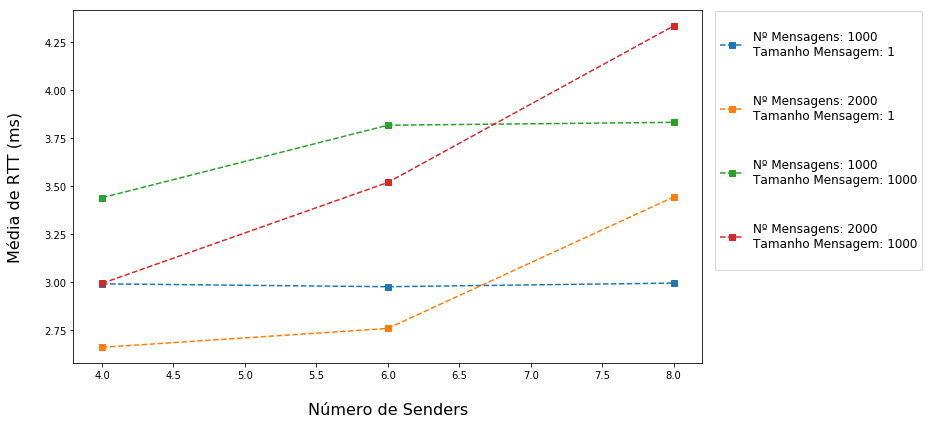

In [32]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False, True,
            'Benchmark 2 - Recepção Massiva (1 Destinatário)', 
            'Número de Senders', 
            'NumberOfSender')

## Benchmark 3

In [33]:
df = getBenchmark(3)
df = df.groupby(['NumberOfPairs', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,NumberOfPairs,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,4,1,1000,2.9070,1.0,88.0,3.335788
1,4,1,2000,2.5355,1.0,90.0,2.842319
2,4,1000,1000,3.6490,1.0,86.0,3.970083
3,4,1000,2000,2.8990,1.0,93.0,2.902932
4,6,1,1000,2.8720,1.0,89.0,3.259792
5,6,1,2000,2.6640,1.0,88.0,2.644731
6,6,1000,1000,3.5090,1.0,87.0,3.297088
7,6,1000,2000,3.7020,1.0,95.0,2.903689
8,8,1,1000,3.1110,1.0,96.0,3.818280
9,8,1000,1000,4.1900,1.0,100.0,4.076582


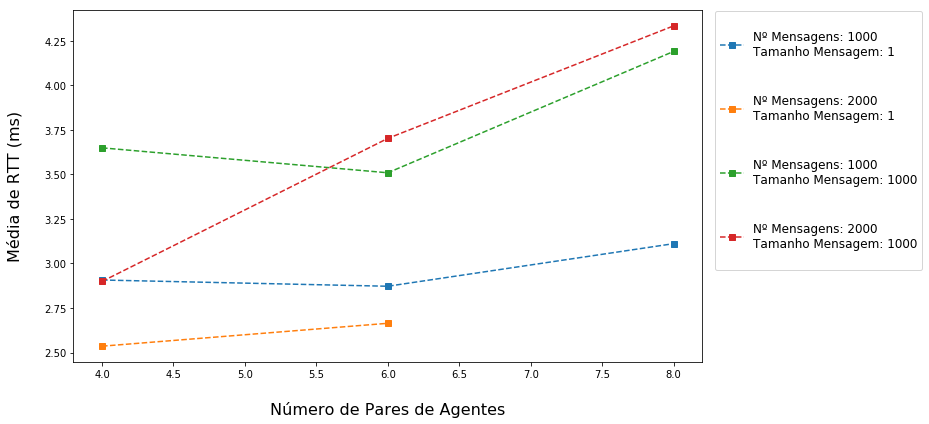

In [34]:
messagesComb = [(1,1000),(1,2000),(1000,1000),(1000,2000)]
plot_results(df, messagesComb,  False, True,
            'Benchmark 3 - Recepção Massiva (N Destinatários)', 
            'Número de Pares de Agentes', 
            'NumberOfPairs')

## Benchmark 4 - InterPlataforma

In [41]:
df = getBenchmark(4)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,5,1,250,22.164000,1.0,132.0,19.094593
1,5,1,500,16.525999,1.0,232.0,16.875393
2,10,1,250,153.255997,2.0,725.0,101.408905
3,10,1,500,157.682007,1.0,557.0,96.465851
4,15,1,250,421.832001,1.0,1256.0,225.551056
5,15,1,500,449.696014,1.0,1260.0,187.018021
6,20,1,250,763.843994,234.0,1997.0,264.894379
7,20,1,500,743.171997,17.0,2252.0,285.569611


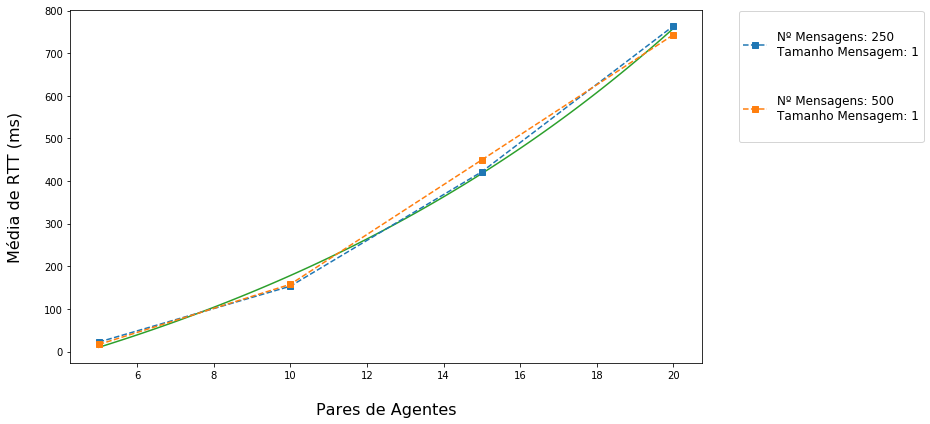

In [42]:
func = funcExp

messagesComb = [(1,250), (1,500)]
plot_results(df, messagesComb, False, True,
            'Benchmark 4 (InterPlataforma)- Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

popt, pcov = curve_fit(func, df['AgentsPerHost'], df['RTT_mean'])

xdata = np.linspace(5, 20, 100)
plt.plot(xdata, func(xdata, *popt))

In [43]:
print("a = ", popt[0])
print("b = ", popt[1])
print("c = ", popt[2])

a =  0.0703839555908
b =  280.835280376
c =  -389.424807428


## Benchmark 4 - IntraPlataforma

In [44]:
df = getBenchmark(5)
df = df.groupby(['AgentsPerHost', 'MessageSize', 'NumberOfMessages']).agg({'RTT': ['mean', 'min', 'max', 'std']})
df.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std']
df = df.reset_index()
df

,AgentsPerHost,MessageSize,NumberOfMessages,RTT_mean,RTT_min,RTT_max,RTT_std
0,5,1,500,2.286000,0.0,71.0,7.777479
1,5,1,1000,2.284000,0.0,74.0,6.514890
2,10,1,500,53.523998,0.0,304.0,52.095848
3,10,1,1000,50.839001,0.0,269.0,38.026688
4,15,1,500,142.102005,0.0,914.0,124.927345
5,15,1,1000,124.392998,0.0,945.0,111.867905
6,20,1,500,302.661987,0.0,1890.0,266.406921
7,20,1,1000,314.553986,0.0,1653.0,238.938034


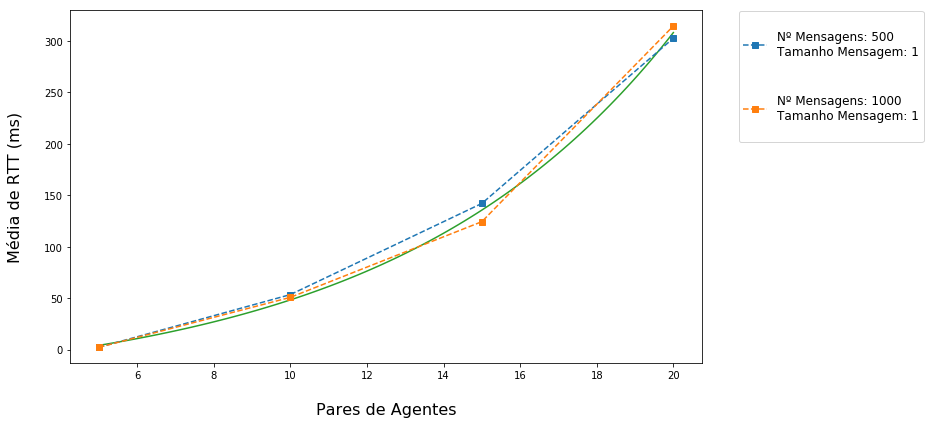

In [45]:
func = funcExp

messagesComb = [(1,500), (1,1000)]
plot_results(df, messagesComb, False, True,
            'Benchmark 4 (Intraplataforma) - Número de Agentes por Host', 
            'Pares de Agentes', 
            'AgentsPerHost')

popt, pcov = curve_fit(func, df['AgentsPerHost'], df['RTT_mean'])

xdata = np.linspace(5, 20, 100)
plt.plot(xdata, func(xdata, *popt))

In [40]:
print("a = ", popt[0])
print("b = ", popt[1])
print("c = ", popt[2])

a =  0.136192078829
b =  22.9163794143
c =  -41.0950860286
